In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import ipycytoscape
import ipywidgets as widgets

Sequences: ['ATTTGC', 'GACCTA', 'AGAGAC', 'TTGCGC', 'CCTAAG', 'GCAGAG']
Constructing graph
overlap of ATTTGC and TTGCGC is 4
overlap of ATTTGC and CCTAAG is 1
overlap of ATTTGC and GCAGAG is 2
overlap of GACCTA and ATTTGC is 1
overlap of GACCTA and AGAGAC is 1
overlap of GACCTA and CCTAAG is 4
overlap of AGAGAC and GACCTA is 3
overlap of AGAGAC and CCTAAG is 1
overlap of TTGCGC and CCTAAG is 1
overlap of TTGCGC and GCAGAG is 2
overlap of CCTAAG and GACCTA is 1
overlap of CCTAAG and AGAGAC is 2
overlap of CCTAAG and GCAGAG is 1
overlap of GCAGAG and GACCTA is 1
overlap of GCAGAG and AGAGAC is 4


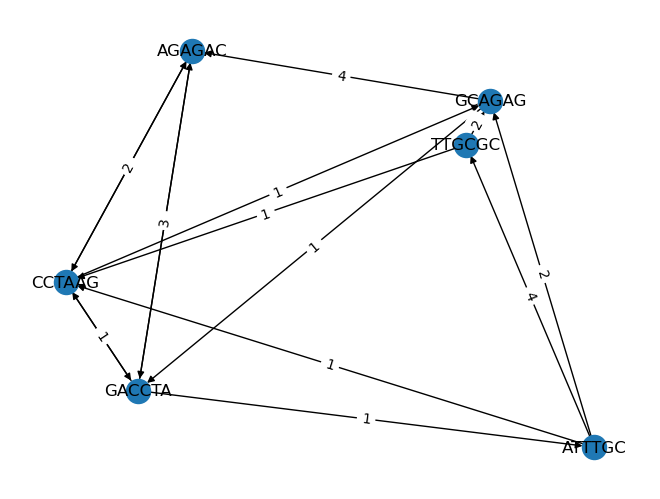

Merging nodes ATTTGC and TTGCGC with overlap 4
reconnecting all incoming nodes
overlap of GACCTA and ATTTGCGC is 1
reconnecting all outgoing nodes
overlap of ATTTGCGC and CCTAAG is 1
overlap of ATTTGCGC and GCAGAG is 2


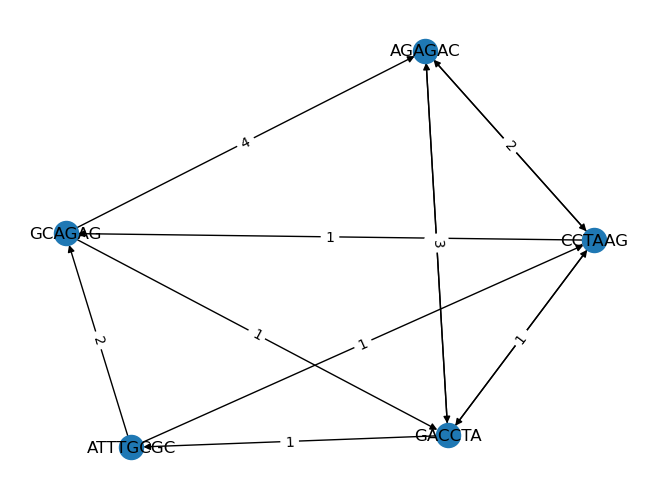

Merging nodes GACCTA and CCTAAG with overlap 4
reconnecting all incoming nodes
overlap of AGAGAC and GACCTAAG is 3
overlap of CCTAAG and GACCTAAG is 1
overlap of GCAGAG and GACCTAAG is 1
reconnecting all outgoing nodes
overlap of GACCTAAG and GACCTA is 1
overlap of GACCTAAG and AGAGAC is 2
overlap of GACCTAAG and GCAGAG is 1


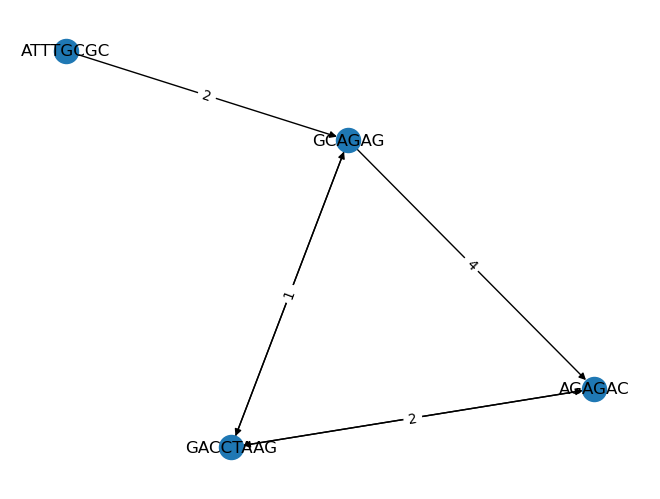

Merging nodes GCAGAG and AGAGAC with overlap 4
reconnecting all incoming nodes
overlap of ATTTGCGC and GCAGAGAC is 2
overlap of GACCTAAG and GCAGAGAC is 1
reconnecting all outgoing nodes
overlap of GCAGAGAC and GACCTAAG is 3


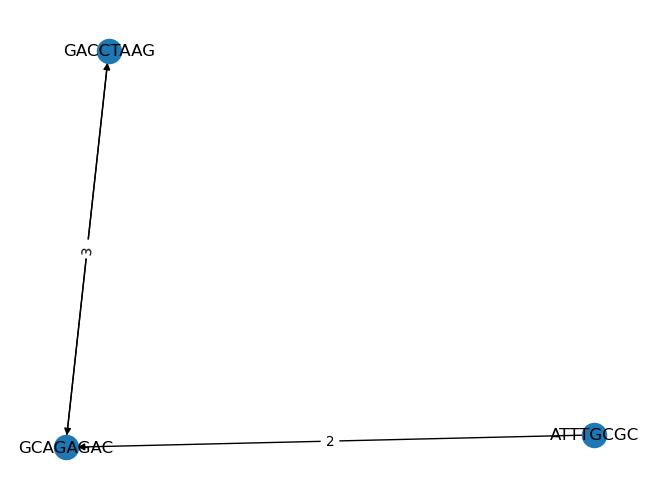

Merging nodes GCAGAGAC and GACCTAAG with overlap 3
reconnecting all incoming nodes
overlap of ATTTGCGC and GCAGAGACCTAAG is 2
overlap of GACCTAAG and GCAGAGACCTAAG is 1
reconnecting all outgoing nodes
overlap of GCAGAGACCTAAG and GCAGAGAC is 1


StopIteration: 

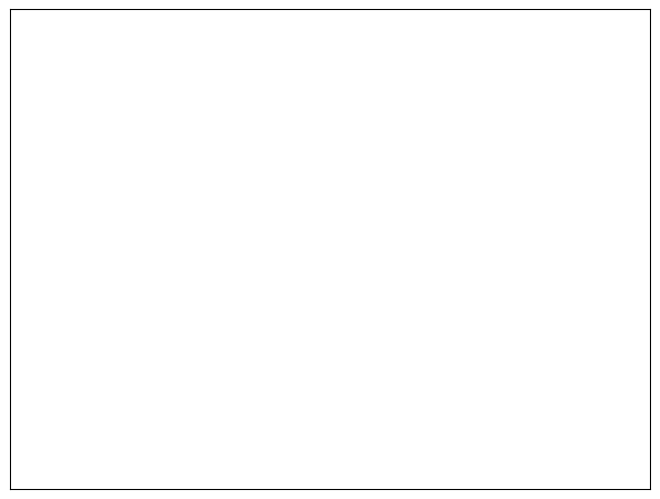

In [8]:
def main():
    seqs = ['ATTTGC', 'GACCTA', 'AGAGAC', 'TTGCGC', 'CCTAAG', 'GCAGAG']
    print(f'Sequences: {seqs}')
    print('Constructing graph')
    G = nx.DiGraph()
    G.add_nodes_from(seqs)
    for a in seqs:
        for b in seqs:
            if a == b:  # skip self references
                continue
            if (o := compute_overlap(a, b)) > 0:
                G.add_edge(a, b, weight=o)
    show_graph(G)
    nx.write_graphml(G, './initial.gml')
    while G.number_of_nodes() > 1:
        a, b, d = find_max_edge(G)
        o = d['weight']
        merge(G, a, b, o)
        show_graph(G)
    print(f'The final sequence (greedy algorithm) is: "{list(G.nodes)[0]}"')

"""Merge node a and b with overlap o"""
def merge(G: nx.DiGraph, a: str, b: str, o: int):
    print(f'Merging nodes {a} and {b} with overlap {o}')
    merged = a+b[o:]
    G.add_node(merged)
    oG = G.copy()  # iterate over connection of the previous graph. this avoids bugs
    print('reconnecting all incoming nodes')
    for u, _ in oG.in_edges(a):
        G.add_edge(u, merged, weight=compute_overlap(u, merged))
    
    print('reconnecting all outgoing nodes')
    for _, v in oG.out_edges(b):
        G.add_edge(merged, v, weight=compute_overlap(merged, v))

    G.remove_nodes_from((a, b))

def find_max_edge(G: nx.Graph):
    return max(G.edges(data=True), key=lambda x: x[2]['weight'])
    

def show_graph(G: nx.Graph):
    labels = nx.get_edge_attributes(G, 'weight')
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

def compute_overlap(a: str, b: str) -> int:
    max_overlap = min(len(a), len(b))
    for o in range(max_overlap, 0, -1):
        if a[-o:] == b[:o]:
            print(f'overlap of {a} and {b} is {o}')
            return o
    return 0


if __name__ == "__main__":
    main()